In [1]:
#Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset

auto=pd.read_csv('Auto_mpg.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
#Checking the shape of dataset
auto.shape

(398, 9)

Observation:
    
    Dataset has 398 rows and 9 columns.

In [4]:
#Checking the columns
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [5]:
#Taking random 20 samples to see it.
auto.sample(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
188,16.0,8,318.0,150,4190,13.0,76,1,dodge coronet brougham
290,15.5,8,351.0,142,4054,14.3,79,1,ford country squire (sw)
312,37.2,4,86.0,65,2019,16.4,80,3,datsun 310
306,28.8,6,173.0,115,2595,11.3,79,1,chevrolet citation
297,25.4,5,183.0,77,3530,20.1,79,2,mercedes benz 300d
73,13.0,8,307.0,130,4098,14.0,72,1,chevrolet chevelle concours (sw)
159,14.0,8,351.0,148,4657,13.5,75,1,ford ltd
339,26.6,4,151.0,84,2635,16.4,81,1,buick skylark
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
199,20.0,6,225.0,100,3651,17.7,76,1,dodge aspen se


Observation:
    
    In horsepower column there is a '?' present . We have to replace it via null value and then fill the null value with
    
    mean, median or mode.

In [6]:
#Checking the data type of columns.
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
#Checking the information of  columns.
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Observation:
    
    1-Only horsepowe and car name is Object datat type and rest of these are int and float data type.
    
    2- It shows no null values but in horsepower column there is a "?" present which will be treated as null value.

In [8]:
#Checking the unique value in horsepower column.
auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Observation:
     
     When we look at unique value of horsepower column then it has a "?"  and data type is object but it should be a 
     
     float type value in it. In order to convert this column first we need to replace missing value "?" in this data to            
     
     "NaN".

In [9]:
#Filling the "?" with nan value.
auto['horsepower'] = auto['horsepower'].replace('?', np.NaN).astype('float64')

In [10]:
#Now checking the null values
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Observation:
    
    Now it shows the null value in horsepower column we can also see it via visualization.

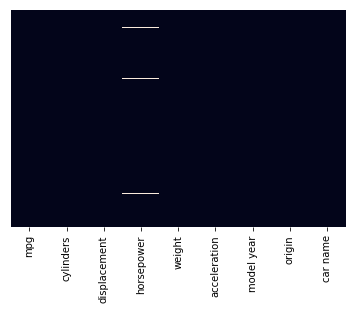

In [11]:
#Seeing the null value via visualization
sns.heatmap(auto.isnull(),yticklabels=False,cbar=False)

Observation:

     Now it shows the null values in horsepower column.

In [12]:
#Replacing the null value with mean

auto['horsepower'].fillna(auto['horsepower'].mean(),inplace=True)

In [13]:
#Now again check the null values present in any columns.

auto.isnull().values.any()

False

Now it shows False that means all the null value are removed and our data is clean and ready for analyzation.

### Now our data se clean and ready for analyzation

# Summary Statistics

In [14]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Observation:
    
    1-Highest mpg is around 47 and lowest is 9.
    
    2-Highest cylinders fitted in cars is  8 and lowest cylinders is 3 for this data set.
    
    3-Highest Displacement is 455 and lowest is 68.
    
    4-Highest horsepower is 230 and lowest is 46.
    
    5-The latest model year present in our dataset is 1982 and oldest one is 1970.
    
    6-Data is right skewed in Cylinders, Displacement, Horsepower, Weight columns.
    
    7-In displacement and Horespower columns difference between 75% and maximum is little bit higher so outliers may be
    
     present in these columns.

# To check the correlation

In [15]:
auto_cor=auto.corr()
auto_cor

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


Here we can see the correlation between the columns.

For Better understanding we can see it via visualization(with the help of heatmap).

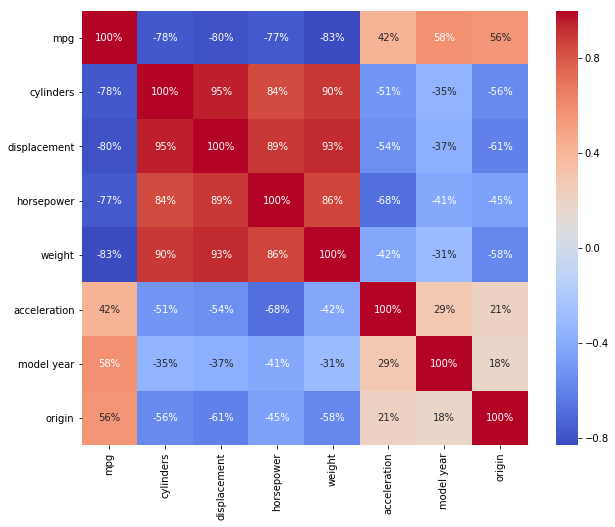

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(auto_cor,annot=True,fmt='.0%',cmap='coolwarm')
plt.show()

Observation:
    
    1-No of cylinders depends on weight of car , its horsepower and displacement. So horsepowe, cylinder,weight and 
      displacement is highly correlated with each other.
    
    2-Acceleration , model year and origin is correlated with each other.

Text(0.5,1,'Correlation with target Variable')

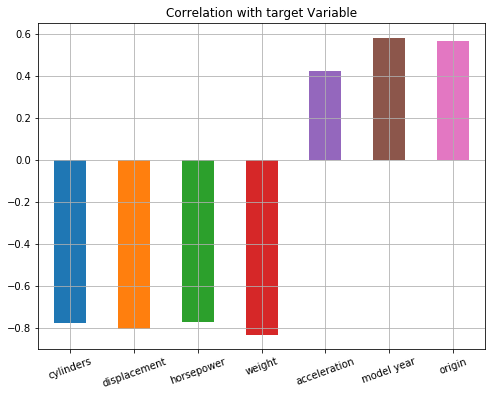

In [17]:
#Correlation with target variable which is mpg
plt.figure(figsize=(8,6))
auto.drop('mpg', axis=1).corrwith(auto['mpg']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target Variable")

Observation:
    
    1-Millage per gallon mainly depends on acceleration , model year and origin.
    
    2-If a car have higher Displacement , horsepower , weight and cylinder than its mpg decreases.

# Data Visualization

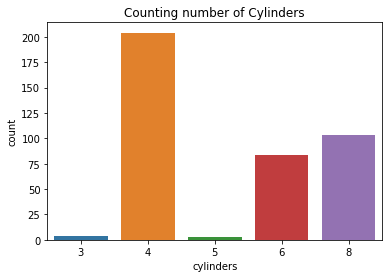

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64


In [18]:
#Counting of Cylinders
sns.countplot(x='cylinders',data=auto)
plt.title("Counting number of Cylinders")
plt.show()

print(auto.cylinders.value_counts())

Observation:
    
    In this dataset mostly cars have 4 cylinders and only five cars have only three cylinders. 

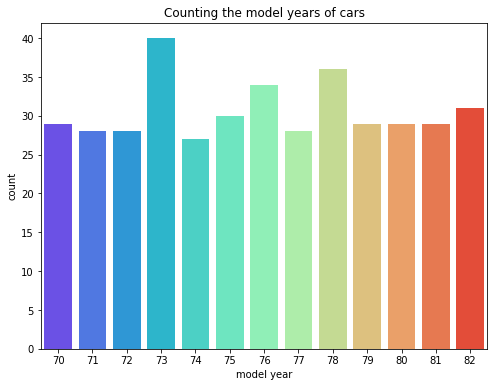

In [19]:
#Counting the model year of cars
plt.figure(figsize=(8,6))
sns.countplot(x='model year',data=auto,palette = "rainbow")
plt.title("Counting the model years of cars")
plt.show()

Observation:
    
    Maximum number of cars are of the year 1973 and minimun number of cars of year 1974.

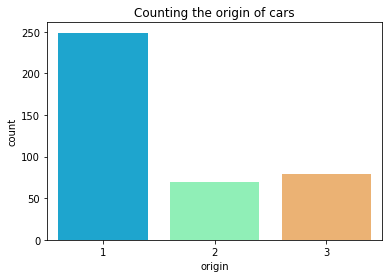

1    249
3     79
2     70
Name: origin, dtype: int64


In [20]:
#Counting the origions of cars

sns.countplot(x='origin',data=auto,palette = "rainbow")
plt.title("Counting the origin of cars")
plt.show()

print(auto.origin.value_counts())

Observation:
    
    Maximum cars are of origin 1.

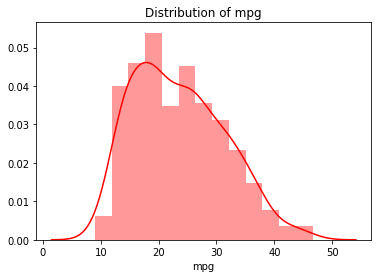

In [21]:
#Plotting the distribution of mpg
sns.distplot(auto['mpg'],color='r')
plt.title("Distribution of mpg")
plt.show()

Observation: The maximum distribution of mpg is around 11 to 20 that means most of the cars have mpg is between 11 to 20.

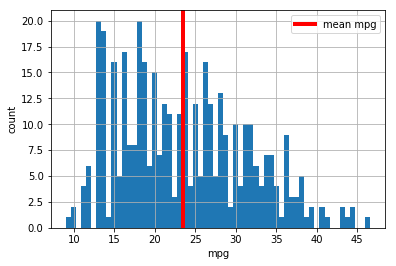

In [22]:
#Checking the mean of mpg

ages = auto['mpg'].hist(bins=60)
mean_val = np.mean(auto['mpg'])
plt.axvline(mean_val,linewidth=4,  color='red', label='mean mpg')
plt.xlabel('mpg')
plt.ylabel('count')
plt.legend()
plt.show()

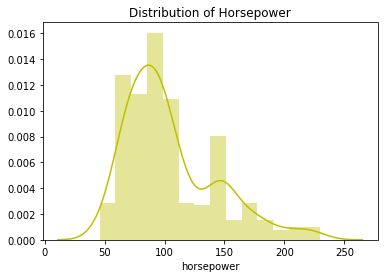

In [23]:
#Plotting the distribution of horsepower
sns.distplot(auto['horsepower'],color='y')
plt.title("Distribution of Horsepower")
plt.show()

Observation: Most of the cars have horsepower between 70 to 110.

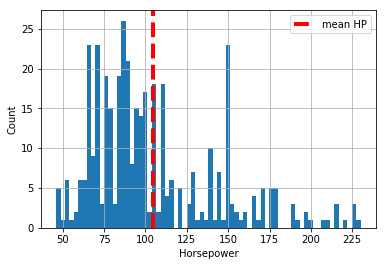

In [24]:
#Checking the mean of horsepower

ages = auto['horsepower'].hist(bins=70)
mean_val = np.mean(auto['horsepower'])
plt.axvline(mean_val,linewidth=4,linestyle='dashed',  color='red', label='mean HP')
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.legend()
plt.show()

Observation:
    
     1-Horsepower rates the engine performance of cars
    
     2-From the above plot we can see the distribution of the horsepower of the vehicles.
     
     3-We can visualize that most of the vehicles have around 75-110 horsepower and only few vehicles have horsepoer 
     
       above 200.
    
     4-Mean horsepower is around 105.



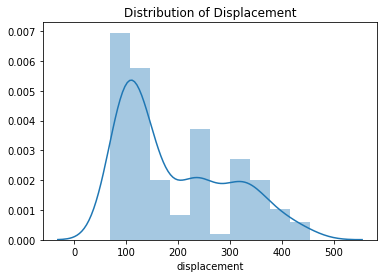

In [25]:
#Plotting the distribution of displacement
sns.distplot(auto['displacement'])
plt.title('Distribution of Displacement')
plt.show()

Engine displacement is the measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the 
combustion chambers.For this reason displacement is one of the measures often used in advertising, as well as regulating,
motor vehicles.

Maximum distribution of displacement is around 90 to 160.

# Bivariate Analysis

### Origin vs mpg

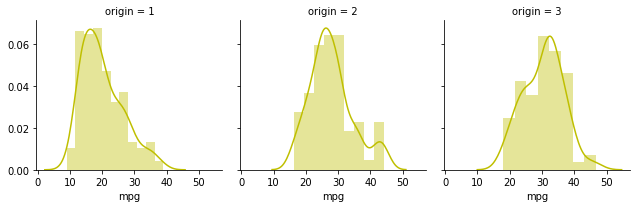

In [26]:
# Exploring origin vs mpg via FaceGrid
facet = sns.FacetGrid(auto, col='origin')
facet.map(sns.distplot, "mpg",color='y')
plt.show()

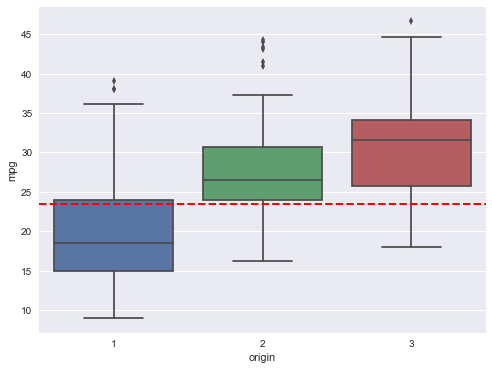

In [27]:
sns.set()
plt.subplots(figsize=(8, 6))
mean_mpg=auto.mpg.mean()
sns.boxplot(x='origin', y="mpg", data=auto)
plt.axhline(mean_mpg,color='r',linestyle='dashed',linewidth=2)
plt.show()

Observation:
    
    From this boxplot we can easily see that region 1 manufactured cars are least efficent in terms of mpg and they are       
    
    almost below our mean mpg.

### Cylinders vs mpg

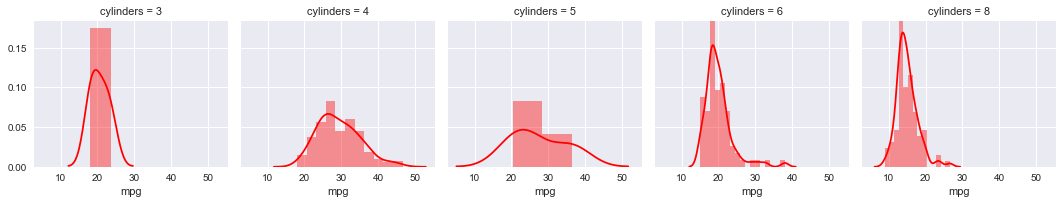

In [28]:
# Exploring Cylinders vs mpg via FaceGrid
facet = sns.FacetGrid(auto, col='cylinders')
facet.map(sns.distplot, "mpg",color='r')
plt.show()

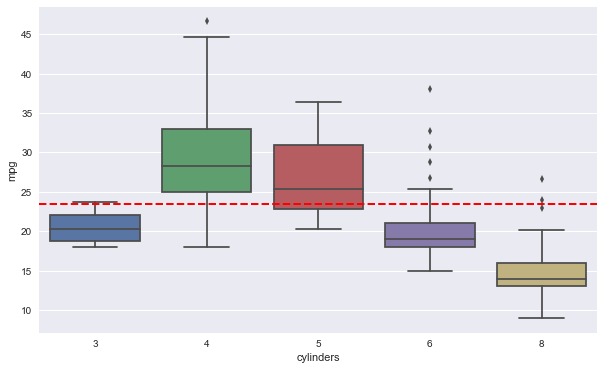

In [29]:
sns.set()
plt.subplots(figsize=(10, 6))
mean_mpg=auto.mpg.mean()
sns.boxplot(x='cylinders', y="mpg", data=auto)
plt.axhline(mean_mpg,color='r',linestyle='dashed',linewidth=2)
plt.show()

Observation:
    
    We can easily visualize that the mileage per gallon (mpg) of 4 cylinder vehicles is maximum and we already saw that
    
    most of the vehicles are 4 cylinder.

### Model year vs mpg

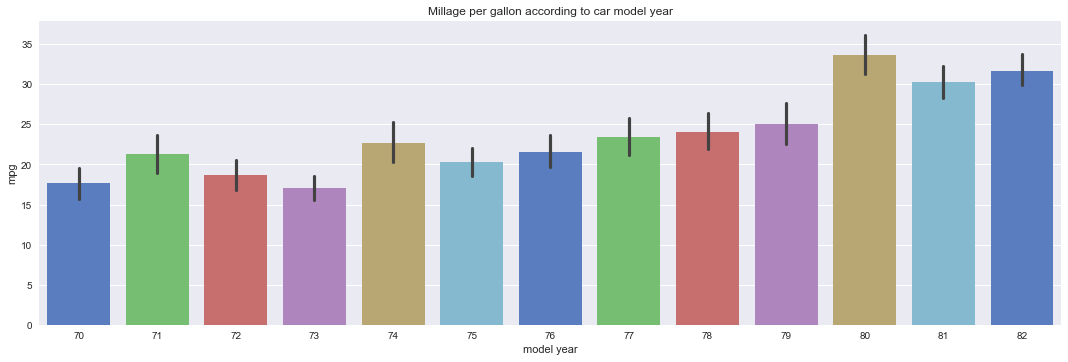

In [30]:
#Factorplot of Education vs Income
sns.factorplot(x="model year",y="mpg",data=auto,kind="bar",size = 5,palette = "muted",aspect=3)
plt.title('Millage per gallon according to car model year')
plt.ylabel("mpg")
plt.show()

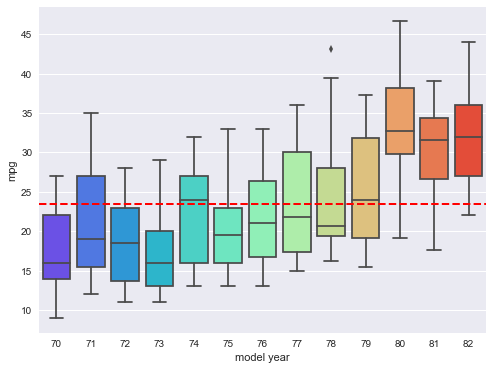

In [31]:
plt.figure(figsize=(8,6))
mean_mpg=np.mean(auto['mpg'])
sns.boxplot(y='mpg',x='model year',data=auto,palette ="rainbow")
plt.axhline(mean_mpg,color='r',linestyle='dashed',linewidth=2)
plt.show()

Observation:
    
    1-1980 model cars have highest mpg around 33.
    
    2-1973 model cars have lowest mpg around 17.

# Multivariate Analysis

<Figure size 576x432 with 0 Axes>

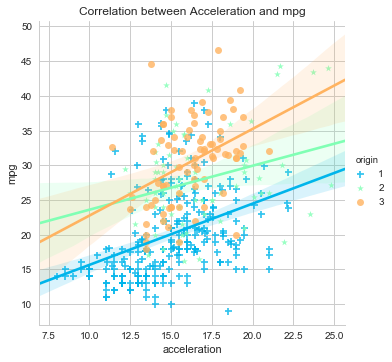

In [32]:
#Correlation between acceleration and mpg based on origion.
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.lmplot(x='acceleration',y='mpg',data=auto,hue='origin',markers=['+','*','o'],palette = "rainbow")
plt.title('Correlation between Acceleration and mpg')
plt.show()

<Figure size 576x432 with 0 Axes>

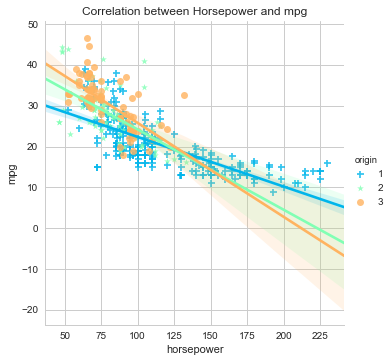

In [33]:
#Correlation between horsepower and mpg based on origion.
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.lmplot(x='horsepower',y='mpg',data=auto,hue='origin',markers=['+','*','o'],palette = "rainbow")
plt.title('Correlation between Horsepower and mpg')
plt.show()

<Figure size 576x432 with 0 Axes>

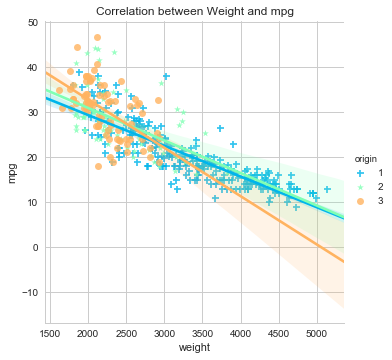

In [34]:
#Correlation between weight and mpg based on origion.
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.lmplot(x='weight',y='mpg',data=auto,hue='origin',markers=['+','*','o'],palette = "rainbow")
plt.title('Correlation between Weight and mpg')
plt.show()

<Figure size 576x432 with 0 Axes>

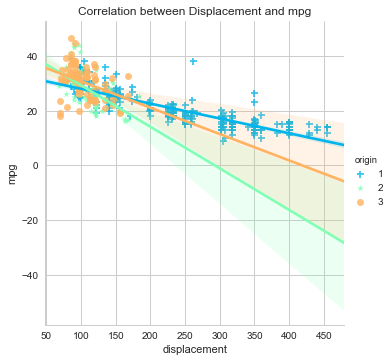

In [35]:
#Correlation between displacement and mpg based on origion.
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.lmplot(x='displacement',y='mpg',data=auto,hue='origin',markers=['+','*','o'],palette = "rainbow")
plt.title('Correlation between Displacement and mpg')
plt.show()

<Figure size 576x432 with 0 Axes>

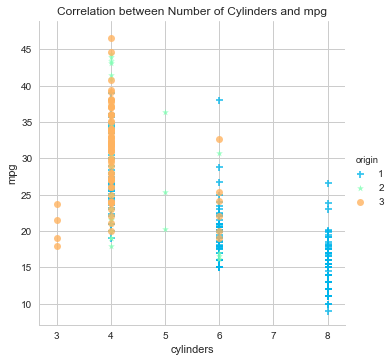

In [36]:
#Correlation between cylinders and mpg based on origion.
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.lmplot(x='cylinders',y='mpg',data=auto,hue='origin',markers=['+','*','o'],palette = "rainbow",fit_reg=False)
plt.title('Correlation between Number of Cylinders and mpg')
plt.show()

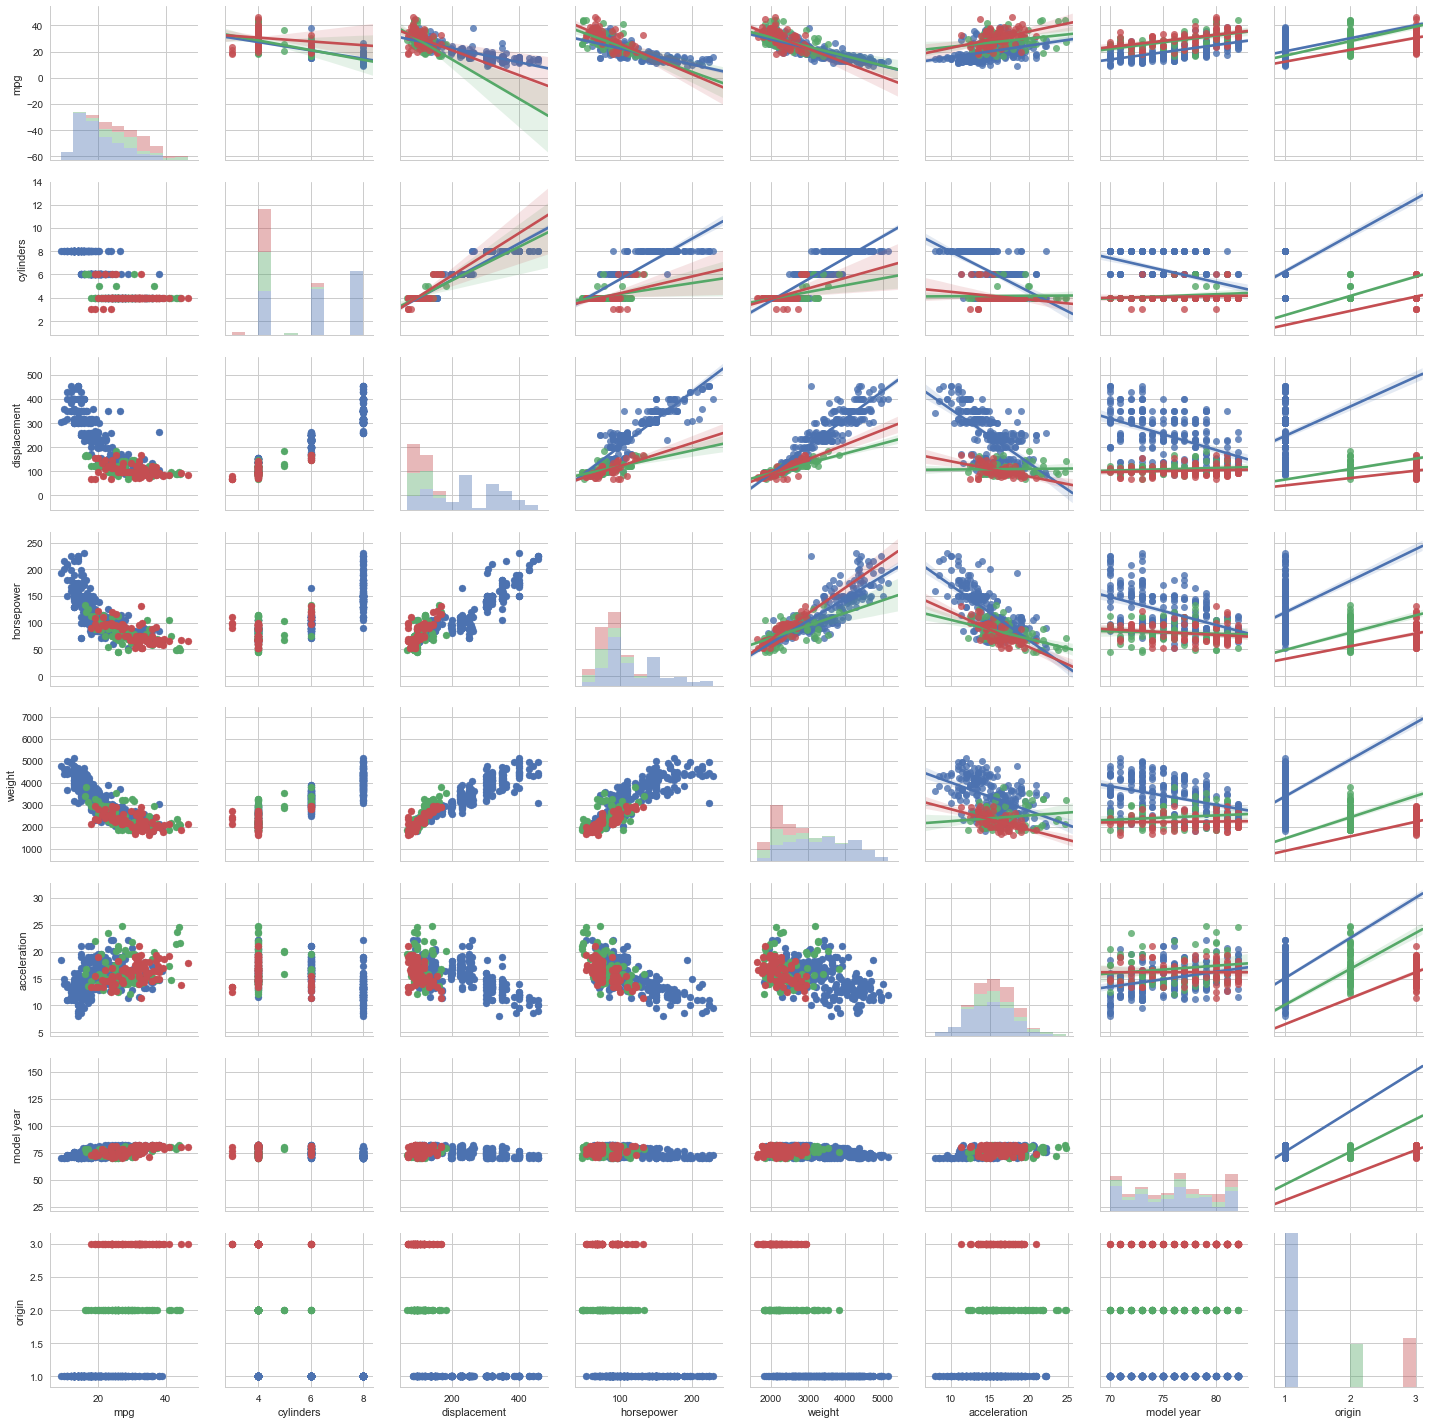

In [37]:
#There are some relation between columns so we can see it via pair wise Relationship.
#PairGrid

pair_grid = sns.PairGrid(auto.drop('car name',axis=1), hue='origin')
pair_grid= pair_grid.map_diag(plt.hist, alpha=0.4)
pair_grid= pair_grid.map_upper(sns.regplot)
pair_grid= pair_grid.map_lower(plt.scatter)

## To Check the skewness

In [38]:
#Checking the skewness
auto.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.095552
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

Observation:
    
    Here skewness present in displacement , horsepower and origin column.

In [39]:
#Removing Skewness via log method

auto['displacement']=np.log(auto['displacement'])
auto['horsepower']=np.log(auto['horsepower'])
auto['origin']=np.log(auto['origin'])

In [40]:
#Again checking the skewness
auto.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.226003
horsepower      0.364639
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.736292
dtype: float64

In [41]:
#Making the copy of our dataset
df=auto.copy()

## Removing Outliers

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df.describe()))
z

array([[2.63460446, 2.6454091 , 2.64555371, 2.64558641, 1.42889972,
        2.64274466, 2.58531327, 2.64574123],
       [0.36701538, 0.3734906 , 0.37283007, 0.3733229 , 0.36201141,
        0.36478273, 0.27742202, 0.37819016],
       [0.49284456, 0.40235926, 0.40810856, 0.40592063, 1.11641798,
        0.4655265 , 0.9203344 , 0.37729891],
       [0.4833543 , 0.39236923, 0.37977273, 0.37915649, 0.58302187,
        0.42429983, 0.33085593, 0.38077545],
       [0.4152241 , 0.38467866, 0.37649007, 0.3753036 , 0.1578203 ,
        0.37849077, 0.30418365, 0.38077545],
       [0.37113985, 0.38467866, 0.37377298, 0.37359127, 0.24579919,
        0.36531821, 0.27751137, 0.38077545],
       [0.32304794, 0.35391634, 0.36940992, 0.37148533, 0.80588868,
        0.35214564, 0.25083909, 0.37550454],
       [0.18197834, 0.35391634, 0.36516939, 0.36680619, 1.87246059,
        0.29218099, 0.22416681, 0.37242126]])

In [43]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


No outliers are present

## Model Training

In [44]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,5.726848,4.867534,3504,12.0,70,0.0,chevrolet chevelle malibu
1,15.0,8,5.857933,5.105945,3693,11.5,70,0.0,buick skylark 320
2,18.0,8,5.762051,5.010635,3436,11.0,70,0.0,plymouth satellite
3,16.0,8,5.717028,5.010635,3433,12.0,70,0.0,amc rebel sst
4,17.0,8,5.710427,4.941642,3449,10.5,70,0.0,ford torino


In [45]:
#Splitting the data into input and output variable.
x=df.drop(columns=['mpg'],axis=1)
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,5.726848,4.867534,3504,12.0,70,0.0,chevrolet chevelle malibu
1,8,5.857933,5.105945,3693,11.5,70,0.0,buick skylark 320
2,8,5.762051,5.010635,3436,11.0,70,0.0,plymouth satellite
3,8,5.717028,5.010635,3433,12.0,70,0.0,amc rebel sst
4,8,5.710427,4.941642,3449,10.5,70,0.0,ford torino


In [46]:
y=df['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [47]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(398, 8) 		 (398,)


In [48]:
#Reshaping target variable

y=y.values.reshape(-1,1)

In [49]:
# Transform Non numeric columns into Numeric columns in input variable

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in x.columns:
    if x[column].dtype==np.number:
        continue
    x[column]=le.fit_transform(x[column])

In [50]:
#Scaling in target variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
y=ss.fit_transform(y)

In [51]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [52]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(318, 8) 		 (80, 8)


In [53]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(318, 1) 	 (80, 1)


In [54]:
#Importing all the model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [55]:
# All Algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) is: 0.8448712803922879
MAE: 0.25779598521271385
MSE: 0.1132658824020731
RMSE: 0.33654997014124527
R2_score: 0.8716302801497742
*****************************************************************************************


Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 0.8704905173182444
MAE: 0.7239862686067344
MSE: 0.7945325814343838
RMSE: 0.8913655711515808
R2_score: 0.09951767710113357
*****************************************************************************************


Score of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') 

In [56]:
# Cross Validate All Algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Score: [0.56140735 0.76861713 0.84055111 0.76436317 0.26829969]
Mean Score: 0.6406476894600416
Standard deviation: 0.2081178228921247
************************************************************************************************


Model: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Score: [-0.80667302 -0.54872118  0.01831822 -0.12194999 -3.24922615]
Mean Score: -0.9416504232182733
Standard deviation: 1.190879223131673
************************************************************************************************


Model: DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_s

### Random Forest Regressor giving best score and also it is not suffering from underfitting and overfitting

Using GridSearchCV to find the best parameters.

In [57]:
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[10,50,100,200,300],'max_depth':[4,5,6,]}
RFC=RandomForestRegressor()

clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 6, 'n_estimators': 50}


In [58]:
#Using Random Forest Regressor with its best parameters

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10,random_state=42,max_depth=6)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('\n')
print("r2_score:",r2_score(y_test,predrf))
print('\n')  

Score: 0.9525616142954303


Mean absolute error: 0.2183850200016415
Mean squared error: 0.09363791000696846
Root Mean Squared Error: 0.30600312091050386


r2_score: 0.8938756135560271




In [59]:
#Cross Validate Random Forest Regressor

score=cross_val_score(rf,x,y,cv=5,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.88793288 0.82931199 0.87550688 0.77873642 0.23953979]
Mean Score: 0.7222055941768817
Standard deviation: 0.24437700752899666


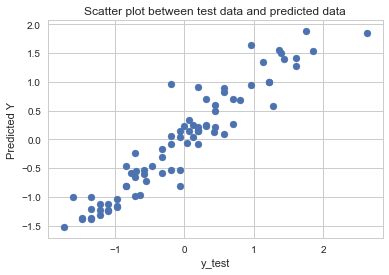

In [60]:
#Plotting scatter plot between test data and predicted data for Random Forest

plt.scatter(y_test,predrf)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title("Scatter plot between test data and predicted data")
plt.show()

### Saving Random Forest Regressor as our best model

In [61]:
#Saving the Model
from sklearn.externals import joblib
joblib.dump(rf,'auto_mpg_reg_rf.pkl')

['auto_mpg_reg_rf.pkl']